In [1]:

import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
# import the necessary packages 
from tensorflow.keras.layers import Input, GlobalAveragePooling2D

# Normal libraries
import pandas as pd
import numpy as np
import os
import shutil

# pickle
import pickle as pk
#import cv2

#
from IPython.display import Image

# visualization libraries
import matplotlib.pyplot as plt

# sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# sklearn tensorflow.keras  libraries
from tensorflow.keras.models  import Sequential, load_model
from tensorflow.keras  import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import binary_crossentropy, categorical_crossentropy, Accuracy
from tensorflow.keras import optimizers


import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.utils import to_categorical


data_class_df = pd.read_csv('/Users/amateos88/code/vivekptl9/Anaemia_Classification/sample_dataset/sickle_slides_new_march.txt')
data_class_df.shape
with open('/Users/amateos88/Desktop/Anaemia/pictures_array.npy', 'rb') as f:
    images = np.load(f)
with open('/Users/amateos88/Desktop/Anaemia/labels_array.npy', 'rb') as f:
    labels = np.load(f)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)


In [2]:
from tensorflow import keras
model2 = keras.models.load_model('/Users/amateos88/code/vivekptl9/Anaemia_Classification/Model/Inc_82_deploy')

2022-09-05 15:20:30.028509: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model2.predict(X_test[8].reshape(224,224,3))

ValueError: in user code:

    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [5]:
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)


In [22]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x) #init
x = Dense(32, activation= 'relu')(x) #init
x = Dense(128, activation= 'relu')(x)
x = Dense(128, activation='relu')(x) 
x = Dense(256, activation='relu')(x) 
x = Dense(512, activation='relu')(x)
x = Dense(1028, activation='relu')(x)
x = Dense(2056, activation='relu')(x)
x = Dense(32, activation='relu')(x) #init
x = Flatten()(x)


TensorShape([None, 32])

In [20]:
x_for_RF = features.predict(X_train)
print(x_for_RF.shape)

AttributeError: 'KerasTensor' object has no attribute 'predict'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=50,random_state=42)
RF_model.fit(x_for_RF,y_train)

In [ ]:
x_test_feature = x.predict(X_test)
print(x_test_feature.shape)


prediction_RF = RF_model.predict(x_test_feature)
print(prediction_RF.shape)

from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_train, prediction_RF))

In [7]:
from tensorflow import keras
model2 = keras.models.load_model('/Users/amateos88/code/vivekptl9/Anaemia_Classification/Model/Inc_82_deploy')

In [19]:
X_test[0].shape

(224, 224, 3)

In [82]:
df = pd.DataFrame(model2.predict(X_test))
df.rename(columns={df.columns[0]:'prob'}, inplace=True)
df1 = df[df['prob'].astype(float) >= 0.49]
df1.head(50)
#df.head(50)

,prob
6,0.999971
10,1.000000
18,0.967834
23,1.000000
26,0.975116
31,0.999998
36,1.000000
38,0.830225
47,1.000000
48,0.999977


Sorry but you are already BURRIED UNDERGROUND!!!


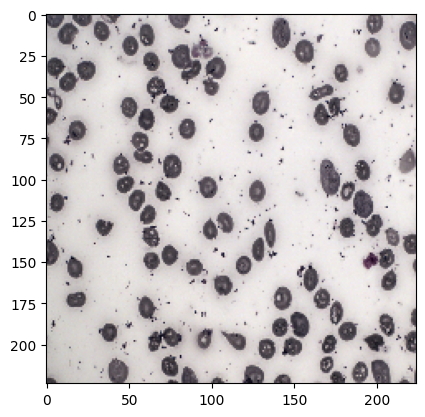

In [116]:
def predict_img(value: int) -> int:
    n = value #Select the index of image to be loaded for testing
    img = X_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    prediction_proba = model2.predict(input_img)[0][0]
    prediction_cnn = int(np.round(model2.predict(input_img))[0][0])

    if prediction_cnn > 0.4 and prediction_cnn < 0.5:
        print(f'The probability of you being SICK is: {np.round(prediction_proba, 2)}')   
    elif prediction_cnn >= 0.5 and prediction_cnn < 0.9:
        print(f'The probability of you being SICK is: {np.round(prediction_proba, 2)}')
    elif prediction_cnn >= 0.9:
        print(f'Sorry but you are already BURRIED UNDERGROUND!!!')
    else:
        print('Congratulations, you are HEALTHY')
# #prediction_RF = RF_model.predict(input_img_features)[0] 
# #prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
# # print("The predicted label for this image is: ", prediction_cnn)
# print("The actual label for this image is: ", y_test[n])
# #img.shape
predict_img(142)

In [33]:
model2.predict(X_test[0])

ValueError: in user code:

    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/amateos88/.pyenv/versions/3.8.12/envs/taxifare-env/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 224, 3)
